<a href="https://colab.research.google.com/github/TabaresJD/default_prediction_project/blob/main/01%20-%20exploraci%C3%B3n%20de%20datos.ipynb?hl=es#scrollTo=MemYANjbht7w" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

## Importación de librerías

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Carga de datos

Se cargan 100,000 datos dados los recursos del sistema para procesar el dataset completo

In [98]:
train = pd.read_csv('train_data.csv', nrows=100000, index_col='customer_ID')

In [99]:
train.shape

(100000, 189)

In [100]:
labels = pd.read_csv('train_labels.csv', index_col='customer_ID')

In [101]:
labels.shape

(458913, 1)

## Preprocesado de datos

Cargamos el csv de train y se decide escoger la celda del cliente como índice

In [102]:
train.head()

S_2       P_2  \
customer_ID                                                                
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-03-09  0.938469   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-04-07  0.936665   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-05-28  0.954180   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-06-13  0.960384   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-07-16  0.947248   

                                                        D_39       B_1  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.001733  0.008724   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005775  0.004923   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.091505  0.021655   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002455  0.013683   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002483  0.015193   

                                                         B_2       R_1  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.006838  0.009228   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.000653  0.006151   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.009672  0.006815   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.002700  0.001373   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.000727  0.007605   

                                                         S_3      D_41  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.124035  0.008771   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.126750  0.000798   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.123977  0.007598   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.117169  0.000685   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.117325  0.004653   

                                                         B_3  D_42  ...  \
customer_ID                                                         ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004709   NaN  ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002714   NaN  ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009423   NaN  ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005531   NaN  ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009312   NaN  ...   

                                                    D_136  D_137  D_138  \
customer_ID                                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   

                                                       D_139     D_140  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002427  0.003706   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003954  0.003167   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003269  0.007329   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006117  0.004516   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003671  0.004946   

                                                       D_141  D_142     D_143  \
customer_ID                                                                     
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003818    NaN  0.000569   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005032    NaN  0.009576   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.000427    NaN  0.003

## Agrupamos los datos de train por cliente con su respectiva media para facilitar el manejo de los datos

Borramos los datos de las fechas para poder tratar los datos por cada cliente; además estas fechas no tienen un orden lógico, por lo tanto no se prestan para ser tratadas como series temporales de Pandas

In [103]:
del(train['S_2'])

In [104]:
data = train.groupby('customer_ID').mean()
data.head()

P_2      D_39  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.933824  0.010704   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.899820  0.215205   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.878454  0.004181   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.598969  0.048862   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.891679  0.004644   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.012007  1.005086   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.025654  0.991083   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004386  0.815677   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.059876  0.955264   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005941  0.814543   

                                                         R_1       S_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004509  0.113215   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006246  0.120578   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006621       NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005665  0.247750   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004180  0.173102   

                                                        D_41       B_3  D_42  \
customer_ID                                                                    
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005021  0.006456   NaN   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004993  0.005663   NaN   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006842  0.005493   NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005490  0.006423   NaN   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005352  0.005088   NaN   

                                                        D_43  ...  D_136  \
customer_ID                                                   ...          
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...       NaN  ...    NaN   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.144571  ...    NaN   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...       NaN  ...    NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.061026  ...    NaN   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.048778  ...    NaN   

                                                    D_137  D_138     D_139  \
customer_ID                                                                  
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN  0.003664   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...    NaN    NaN  0.004906   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...    NaN    NaN  0.006006   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...    NaN    NaN  0.005775   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...    NaN    NaN  0.003853   

                                                       D_140     D_141  D_142  \
customer_ID                                                                     
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005343  0.005178    NaN   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006271  0.006007    NaN   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004675  0.003607    NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005777  0.004181    NaN   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004818  0.004818    NaN   

                                                       D_143     D_144  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005066  0.005283   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004824  0.00421

## Vamos a simular un 10% de datos categóricos

## Valores faltantes (NaN)

Se muestran las columnas con datos faltantes mayores a 5000 instancias

In [105]:
k = train.isna().sum()
k[(k!=0)&(k>5000)]

S_3      18626
D_42     85386
D_43     30195
D_44      5053
D_46     21842
D_48     12915
D_49     89762
D_50     56328
P_3       5411
D_53     73244
S_7      18626
D_56     54123
S_9      52734
D_61     10649
D_62     13765
B_17     56191
D_66     88923
D_73     98851
D_76     88724
D_77     45668
D_78      5053
R_9      94207
D_82     72874
B_29     92928
D_87     99927
D_88     99850
D_105    54142
D_106    89870
R_26     89125
D_108    99470
D_110    99366
D_111    99366
B_39     99327
S_27     25379
B_42     98645
D_132    89817
D_134    96384
D_135    96384
D_136    96384
D_137    96384
D_138    96384
D_142    82728
dtype: int64

Estos son los nombres de las columnas que vamos a simular como categóricas las cuales fueron escogidas de la lista anterior de forma aleatoria dado que al tener una gran cantidad de datos faltantes, no afectará en nuestro resultado el cambiar estos datos y mejor simular estas columnas como variables categóricas; este procedimiento se realizó dados los requerimientos del dataset impuestos por el profesor

In [106]:
columnas = ['D_88','D_87','B_29','R_9','D_73','D_49','D_66','D_76','D_42','D_82']

## Función para el cambio de variables a categóricas 

In [107]:
def categorical_simulation(df,col,n):
#Borramos la columna
    del(df[col])
#Creamos una nueva con el mismo nombre y asignamos los valores de forma aleatoria
    valores = np.array([np.random.randint(1,n) for i in range (df.shape[0])])
    d = pd.DataFrame(valores, index = df.index, columns = [col])
    df = pd.concat([df,d], axis=1)
    return(df)

## Aplicamos la función a las columnas que se escogieron anteriormente

In [108]:
for i in range(len(columnas)):
    data = categorical_simulation(data,columnas[i],np.random.randint(3,7))

## Observamos como queda el dataset modificado con las nuevas variables categóricas

In [109]:
data.head()

P_2      D_39  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.933824  0.010704   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.899820  0.215205   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.878454  0.004181   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.598969  0.048862   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.891679  0.004644   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.012007  1.005086   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.025654  0.991083   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004386  0.815677   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.059876  0.955264   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005941  0.814543   

                                                         R_1       S_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004509  0.113215   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006246  0.120578   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006621       NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005665  0.247750   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004180  0.173102   

                                                        D_41       B_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005021  0.006456   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004993  0.005663   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006842  0.005493   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005490  0.006423   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005352  0.005088   

                                                        D_43      D_44  ...  \
customer_ID                                                             ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...       NaN  0.004673  ...   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.144571  0.004311  ...   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...       NaN  0.013902  ...   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.061026  0.005246  ...   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.048778  0.003551  ...   

                                                    D_88  D_87  B_29  R_9  \
customer_ID                                                                 
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...     2     4     2    2   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...     2     2     3    2   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...     1     2     3    2   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...     2     1     3    1   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...     2     1     3    2   

                                                    D_73  D_49  D_66  D_76  \
customer_ID                                                                  
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...     1     1     1     3   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...     3     2     5     2   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...     3     1     4     3   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...     1     2     3     2   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...     1     2     4     3   

                                                    D_42  D_82  
customer_ID                                                     
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...     3     1  
00000fd6641609c6ece5454664794f0340ad84dddce9a26...     2     5  
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...     1     1  
000041bdba6ecad

## Observamos los diferentes tipos de datos

A continuación se muestran los diferentes tipos de variables: tanto categóricas como continuas

In [110]:
for c in data.columns:
    print ("%20s"%c, train[c].dtype)
## Agrupamos los datos de train por cliente con su respectiva media para facilitar el manejo de los datos

                 P_2 float64
                D_39 float64
                 B_1 float64
                 B_2 float64
                 R_1 float64
                 S_3 float64
                D_41 float64
                 B_3 float64
                D_43 float64
                D_44 float64
                 B_4 float64
                D_45 float64
                 B_5 float64
                 R_2 float64
                D_46 float64
                D_47 float64
                D_48 float64
                 B_6 float64
                 B_7 float64
                 B_8 float64
                D_50 float64
                D_51 float64
                 B_9 float64
                 R_3 float64
                D_52 float64
                 P_3 float64
                B_10 float64
                D_53 float64
                 S_5 float64
                B_11 float64
                 S_6 float64
                D_54 float64
                 R_4 float64
                 S_7 float64
              

## Concatenamos los DataFrames porque la variable objetivo se encuentra en un dataset diferente al cual estamos trabajando

In [111]:
labels.head()

target
customer_ID                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...       0
00000fd6641609c6ece5454664794f0340ad84dddce9a26...       0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...       0
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...       0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...       0

In [112]:
datos = pd.concat([data,labels.drop(labels.index[len(data.index):-1])], axis = 1)
datos = datos.drop(datos.index[-1])

## Ahora se muestran los datos un poco más organizados y además se agregó la variable objetivo

In [113]:
datos

P_2      D_39  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.933824  0.010704   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.899820  0.215205   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.878454  0.004181   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.598969  0.048862   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.891679  0.004644   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.487335  0.131842   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.932400  0.097467   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.831539  0.058936   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.397782  0.039394   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.664669  0.004530   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.012007  1.005086   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.025654  0.991083   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004386  0.815677   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.059876  0.955264   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005941  0.814543   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.696957  0.024518   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.017680  0.990289   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.012922  0.874011   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.541662  0.034387   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.008407  0.815422   

                                                         R_1       S_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004509  0.113215   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006246  0.120578   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006621       NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005665  0.247750   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004180  0.173102   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.081443  0.215530   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.003905  0.114927   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.003873  0.152555   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.004060  0.158072   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.007472       NaN   

                                                        D_41       B_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005021  0.006456   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004993  0.005663   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006842  0.005493   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005490  0.006423   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005352  0.005088   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.004771  0.943216   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.026687  0.005355   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.005184  0.011129   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.004642  0.505230   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.005732  0.008866   

                                                        D_43      D_44  ...  \
customer_ID                                                             ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb

## Inspeccionamos variables numéricas

In [114]:
datos.describe().T

count      mean       std       min       25%       50%       75%  \
P_2     8248.0  0.645217  0.238169 -0.208841  0.461826  0.676924  0.854063   
D_39    8294.0  0.153711  0.166852  0.000428  0.021303  0.112053  0.230677   
B_1     8294.0  0.129424  0.203707 -0.020321  0.016494  0.039711  0.142354   
B_2     8293.0  0.614871  0.350243  0.001010  0.260582  0.813680  0.902776   
R_1     8294.0  0.082176  0.160991  0.000083  0.004828  0.005874  0.081934   
...        ...       ...       ...       ...       ...       ...       ...   
D_66    8294.0  3.007114  1.408685  1.000000  2.000000  3.000000  4.000000   
D_76    8294.0  2.001809  0.815633  1.000000  1.000000  2.000000  3.000000   
D_42    8294.0  2.487461  1.118355  1.000000  1.000000  2.000000  3.000000   
D_82    8294.0  3.016036  1.415444  1.000000  2.000000  3.000000  4.000000   
target  8294.0  0.265011  0.441366  0.000000  0.000000  0.000000  1.000000   

             max  
P_2     1.008938  
D_39    2.677759  
B_1     1.324053  
B_2     1.008287  
R_1     1.758894  
...          ...  
D_66    5.000000  
D_76    3.000000  
D_42    4.000000  
D_82    5.000000  
target  1.000000  

[187 rows x 8 columns]

# Visualización variable objetivo

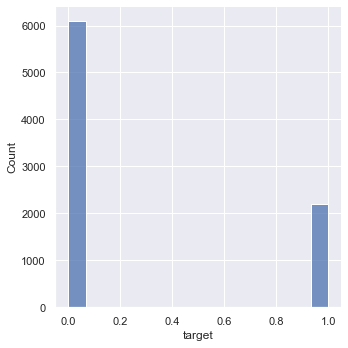

In [115]:
sns.displot(datos['target'])

## ¿Qué variables tienen una mayor correlación con nuestra variable a predecir?

Variables con una correlación mayor a 45%

In [116]:
corrmat = datos.corr()
columns = corrmat[abs(corrmat['target'])>0.45].index
columns

Index(['P_2', 'B_2', 'R_1', 'D_44', 'D_48', 'B_9', 'D_58', 'D_61', 'B_18',
       'D_75', 'B_33', 'target'],
      dtype='object')

# Pairplot para las variables de mayor correlación

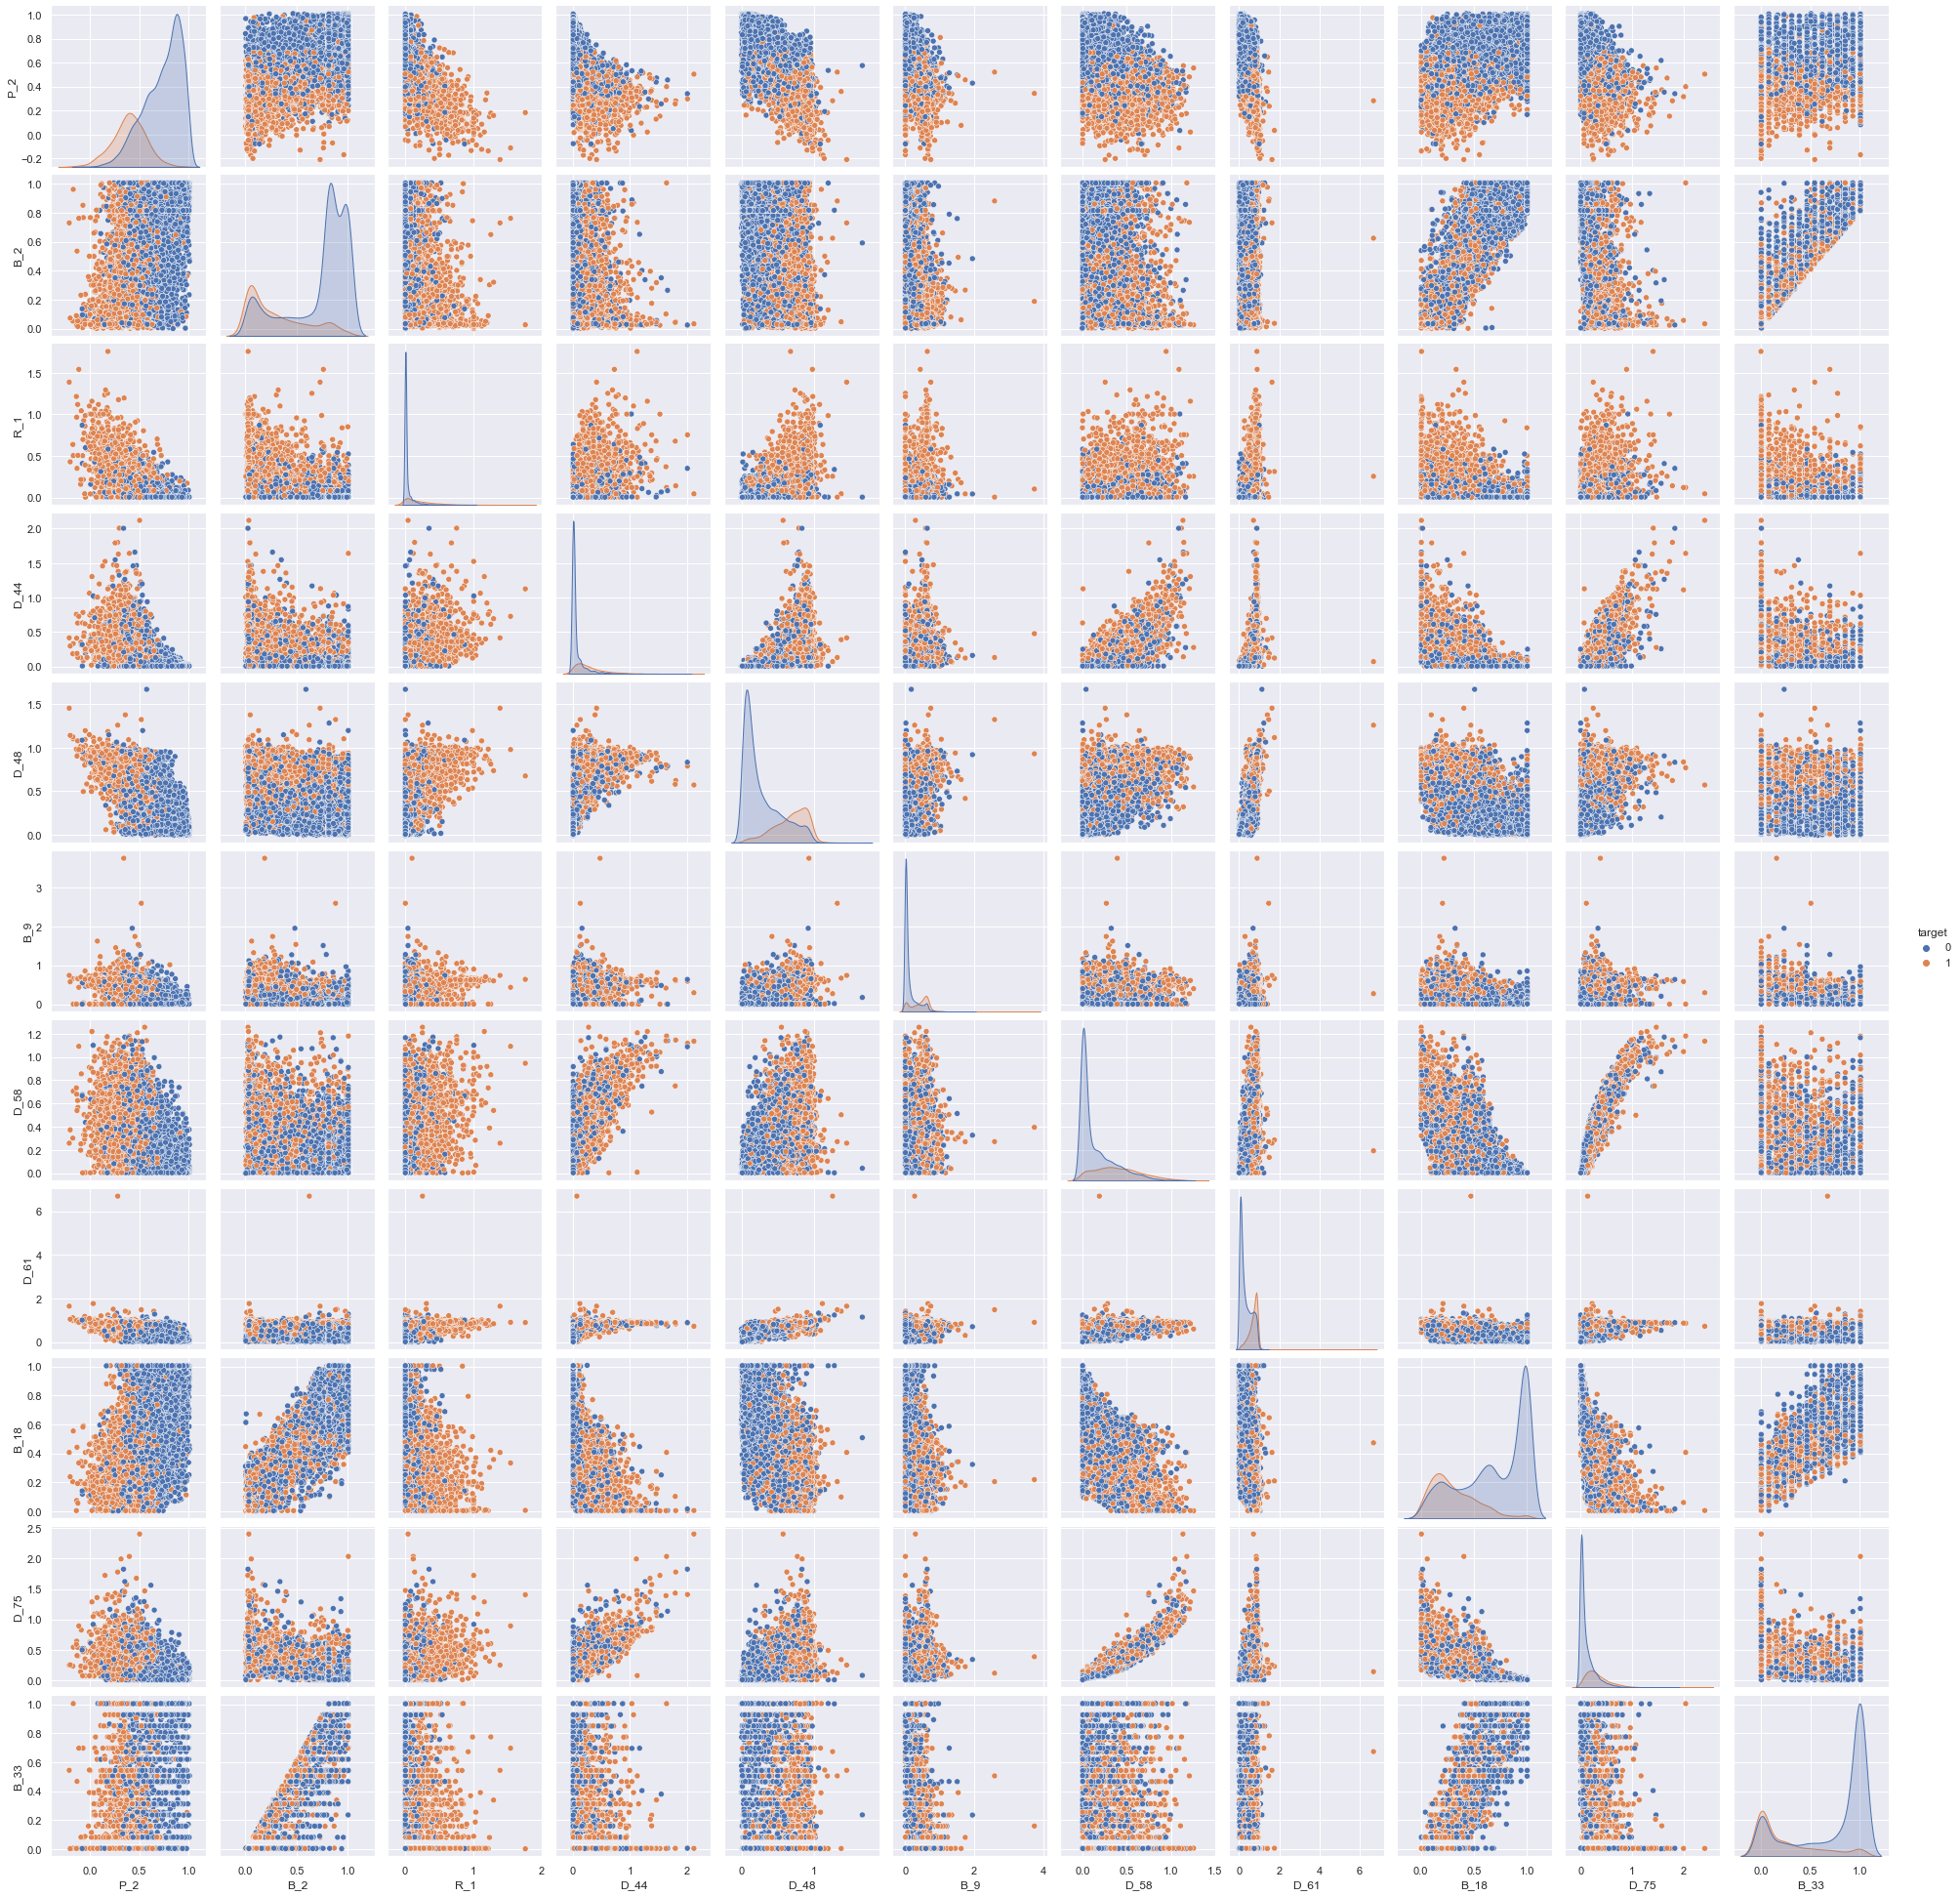

In [117]:
sns.set()
sns.pairplot(datos[columns], hue = 'target')

## Matriz de correlación

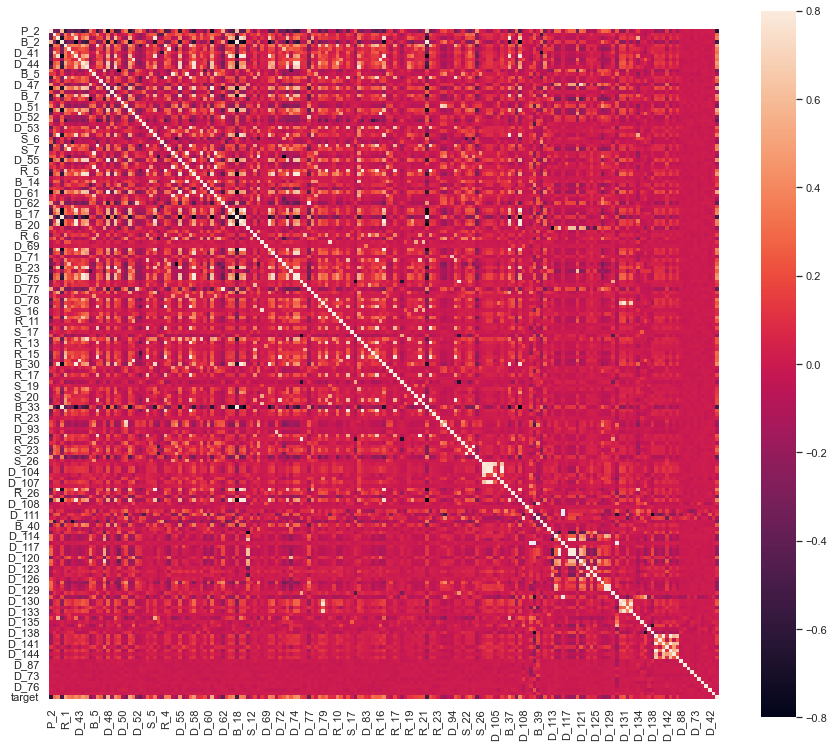

In [118]:
f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(corrmat,vmax=0.8,vmin=-0.8, square=True);

## Ahora procedemos a observar las correlaciones de nuestra variable a predecir

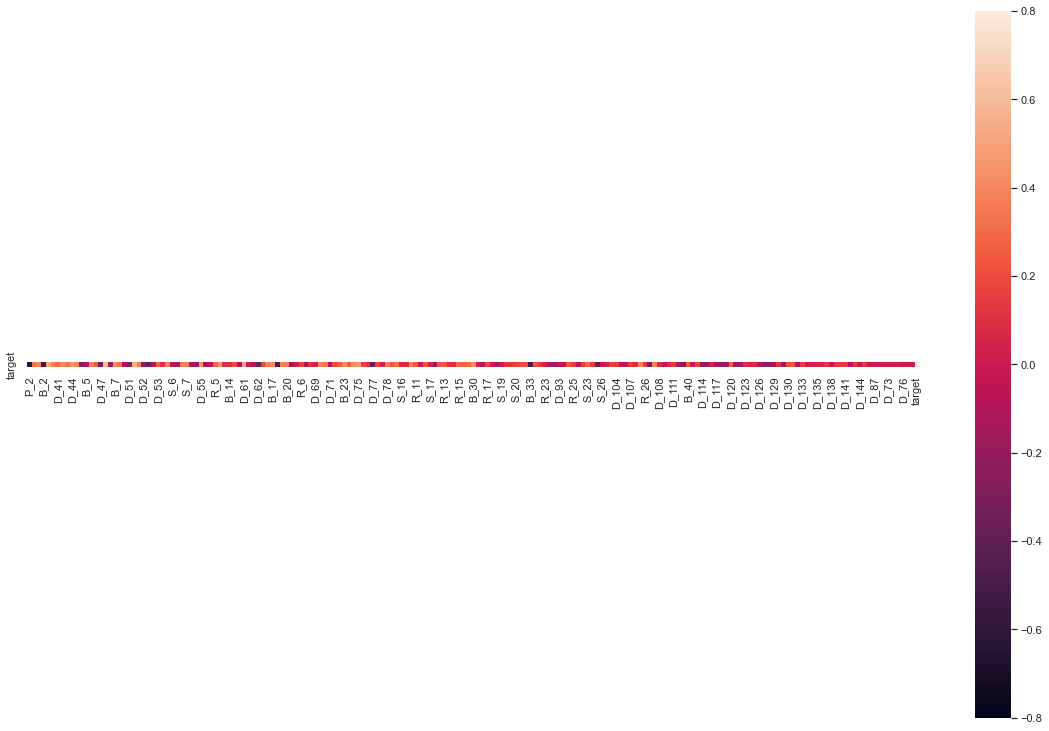

In [119]:
f, ax = plt.subplots(figsize=(20, 13))
sns.heatmap(corrmat[186:187],vmax=0.8,vmin=-0.8,square=True);

## Visualización de datos faltantes

Esta visualización la realizaremos para las primeras 2000 instancias, partiendo el dataset en 2 partes; la primera imagen serán las primeras 100 columnas y la segunda imagen serán las columnas restantes

### Primera visualización

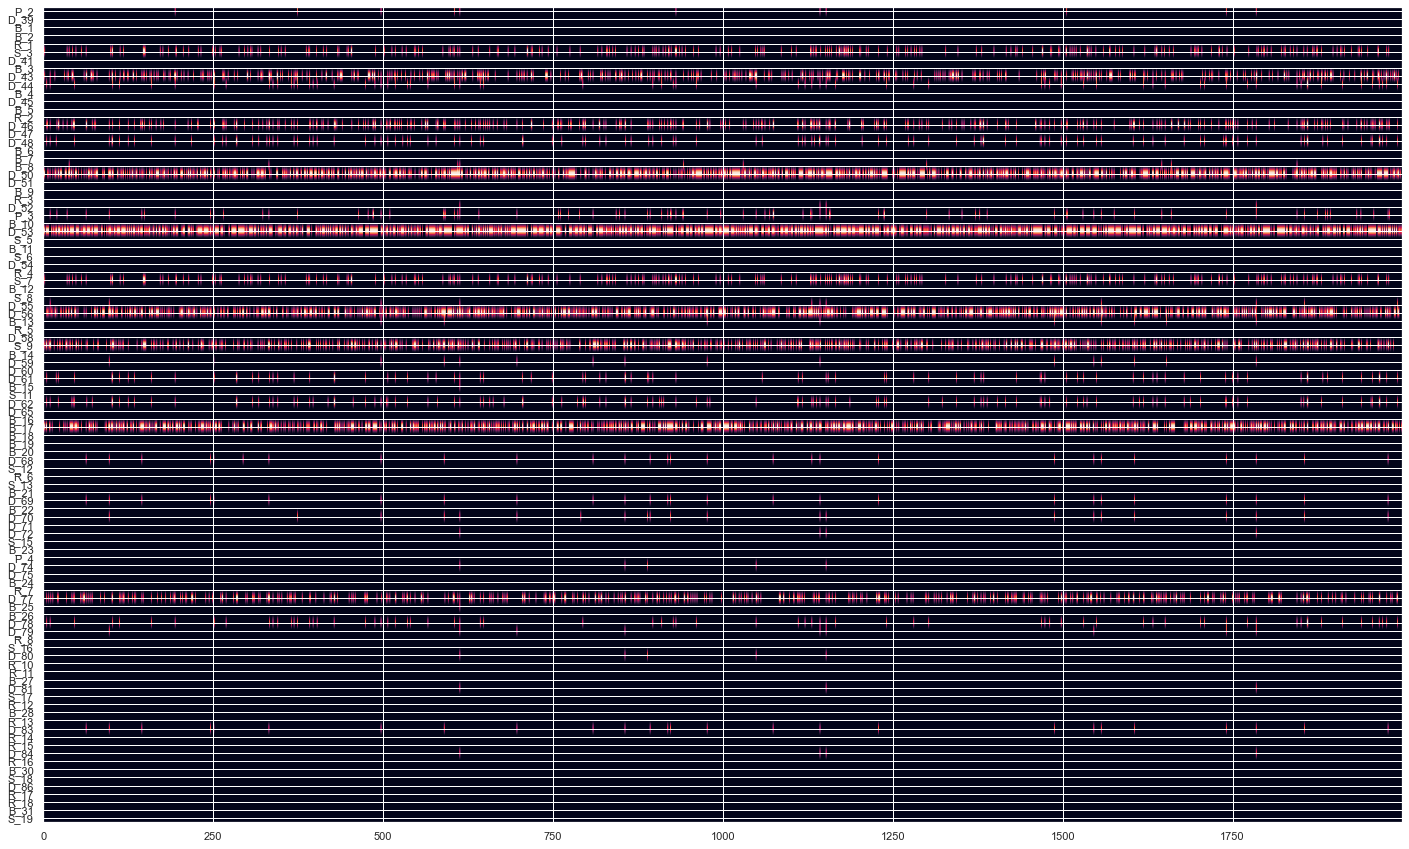

In [120]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(datos[datos.columns[:100]][0:2000].isna().values.T)
ax.set_aspect(12)
plt.yticks(range(datos[datos.columns[:100]][0:2000].shape[1]), datos.columns[:100]);

### Segunda visualización

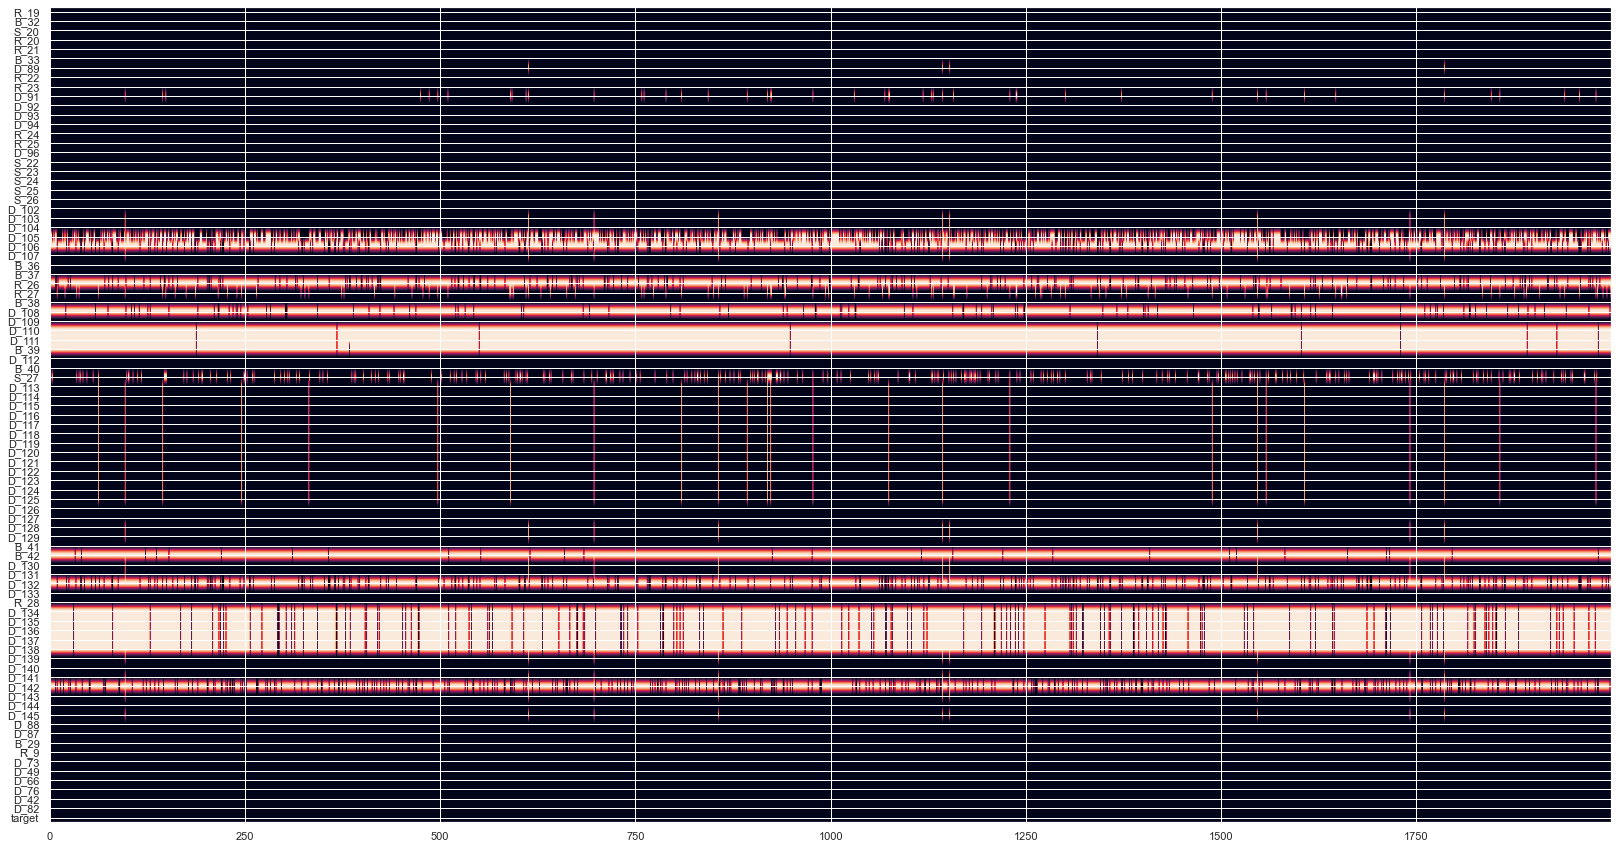

In [121]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(datos[datos.columns[100:]][0:2000].isna().values.T)
ax.set_aspect(12)
plt.yticks(range(datos[datos.columns[100:]][0:2000].shape[1]), datos.columns[100:]);

## Limpieza de datos

### A continuación se mostrarán las columnas con más del 50% de datos faltantes; las cuales serán eliminadas dado que no aportan información de valor

In [122]:
nulos = datos.isna().sum()
dt = nulos[(nulos!=0)&(nulos>(datos.shape[0]*0.4))]
dt

D_50     4484
D_53     5641
D_56     3890
B_17     3837
D_105    3945
D_106    7140
R_26     7381
D_108    7906
D_110    8212
D_111    8212
B_39     8211
B_42     8173
D_132    7138
D_134    7661
D_135    7661
D_136    7661
D_137    7661
D_138    7661
D_142    6735
dtype: int64

In [123]:
elm = np.array(dt.index)
len(elm)

19

In [124]:
for i in elm:
    del(datos[i])
datos

P_2      D_39  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.933824  0.010704   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.899820  0.215205   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.878454  0.004181   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.598969  0.048862   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.891679  0.004644   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.487335  0.131842   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.932400  0.097467   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.831539  0.058936   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.397782  0.039394   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.664669  0.004530   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.012007  1.005086   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.025654  0.991083   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004386  0.815677   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.059876  0.955264   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005941  0.814543   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.696957  0.024518   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.017680  0.990289   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.012922  0.874011   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.541662  0.034387   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.008407  0.815422   

                                                         R_1       S_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004509  0.113215   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006246  0.120578   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006621       NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005665  0.247750   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004180  0.173102   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.081443  0.215530   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.003905  0.114927   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.003873  0.152555   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.004060  0.158072   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.007472       NaN   

                                                        D_41       B_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005021  0.006456   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004993  0.005663   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006842  0.005493   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005490  0.006423   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005352  0.005088   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.004771  0.943216   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.026687  0.005355   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.005184  0.011129   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.004642  0.505230   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.005732  0.008866   

                                                        D_43      D_44  ...  \
customer_ID                                                             ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb

### Ahora procederemos a determinar las columnas restantes con valores nulos, para remplazarlos por un valor en una primera instacia; sin embargo, esto puede modificarse en cualquier momento para aumentar el rendimiento del modelo.

In [125]:
nulos_new = datos.isna().sum()
fill = nulos_new[nulos_new!=0]
fill

P_2        46
B_2         1
S_3      1058
D_41        1
B_3         1
         ... 
D_131      43
D_139      43
D_141      43
D_143      43
D_145      43
Length: 77, dtype: int64

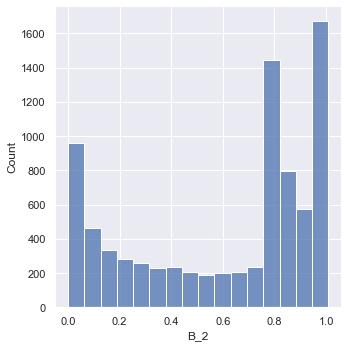

In [126]:
sns.displot(datos[fill.index[1]])

### Estas son las variables categoricas definidas por el dataset inicial

In [127]:
categorics = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_68']


In [128]:
numerics = fill.drop(categorics, axis = 0)

In [129]:
datos['S_3'][100:120]

customer_ID
000f4b8159b2bbe635ace9493931e7ada2ddcb3fdc2f88fbd9f89d463b93b06b    0.133971
000f6da00ca504da14c0079936e8dc9f4971fc4405e45db424848a3015dde525         NaN
000f8675ede66cc6affd4c048db11a00246d7ee623f453aae22d693c4a82f832         NaN
000f8fcfe7ca030fc553a55027ecdd0219fc8e2794c9af713f1ace182fd3064d    0.260371
000fbdd8416278a0be960edf1b06e37eaa94db5c3536fe91eacca2b83119ad5b    0.378042
000ff27e5fa776da26ae9b404699acdb036f79875e466cecf05765dcab50d447    0.147522
001089806583b378098bd81a88eb877a821202b1dfe257f963835d803c4debf0    0.619490
001089b6fb7c690f753cf4b6f05344e693f1c9248bd642d30e5f7762694380ab    0.170616
0010fc44055df7e9d81c24dcb4a9b10c16a1d01412c12c053632816a12b1c1a6    0.132495
00115d9ba7650295cdfc73537fe5efad4f3de6838064ce805e5ede8fe772bda5    0.171684
00116df300d0b6762bf4661c53fa499bd4b8915b6a6636012f1000bd30fabac3    0.166842
0011c2e793d6eded8ab7d4c76c14278bfd870ab91918a17fdeba7d287f0051a2    0.247079
0011d1930636c6a57fab755d232cab01d68d838a090ca348b0c5aeaf66e982a3

### Función para rellenar los datos numericos faltantes con una distribucion normal

In [130]:
def fillna_numerics(df,col):
  
    for pos, i in enumerate(df[col].isna().values):
      if i == True:
          df.loc[df.index[pos], col] = np.random.normal(loc = df[col].mean(), scale = df[col].std())     
  
    return df

In [131]:
for i in range(numerics.shape[0]):
     fillna_numerics(datos,numerics.index[i])

In [132]:
datos['S_3'][100:120]

customer_ID
000f4b8159b2bbe635ace9493931e7ada2ddcb3fdc2f88fbd9f89d463b93b06b    0.133971
000f6da00ca504da14c0079936e8dc9f4971fc4405e45db424848a3015dde525    0.323597
000f8675ede66cc6affd4c048db11a00246d7ee623f453aae22d693c4a82f832    0.063605
000f8fcfe7ca030fc553a55027ecdd0219fc8e2794c9af713f1ace182fd3064d    0.260371
000fbdd8416278a0be960edf1b06e37eaa94db5c3536fe91eacca2b83119ad5b    0.378042
000ff27e5fa776da26ae9b404699acdb036f79875e466cecf05765dcab50d447    0.147522
001089806583b378098bd81a88eb877a821202b1dfe257f963835d803c4debf0    0.619490
001089b6fb7c690f753cf4b6f05344e693f1c9248bd642d30e5f7762694380ab    0.170616
0010fc44055df7e9d81c24dcb4a9b10c16a1d01412c12c053632816a12b1c1a6    0.132495
00115d9ba7650295cdfc73537fe5efad4f3de6838064ce805e5ede8fe772bda5    0.171684
00116df300d0b6762bf4661c53fa499bd4b8915b6a6636012f1000bd30fabac3    0.166842
0011c2e793d6eded8ab7d4c76c14278bfd870ab91918a17fdeba7d287f0051a2    0.247079
0011d1930636c6a57fab755d232cab01d68d838a090ca348b0c5aeaf66e982a3

### Función para rellenar los datos categoricos faltantes 

In [133]:
def fillna_categorics(df,col):
    for pos, i in enumerate(df[col].isna().values):
        if i == True:
            df.loc[df.index[pos], col] = np.random.randint(df[col].max()+1)
    return df  

In [134]:
for i in range(len(categorics)):
     fillna_categorics(datos,categorics[i])

### Función para estandarizar los datos categoricos (redondear valores a enteros)

In [135]:
def rounding(df,cols):
    for i in cols:

        for pos, item in enumerate(df[i].values):
            df.loc[df.index[pos], i] = df.loc[df.index[pos], i].round()

In [136]:
rounding(datos,categorics)

### Función para renombrar los datos de las columnas categoricas para posteriormente realizar el one hot encoding

In [137]:
def num_to_categorics(df, cols):
    for i in cols:
        for pos, item in enumerate(df[i].values):
                df.loc[df.index[pos], i] = i+'_'+str(int(df.loc[df.index[pos], i]))

In [138]:
col_categorics=categorics+columnas

In [139]:
num_to_categorics(datos,col_categorics)
datos[col_categorics]

B_30    B_38    D_114  \
customer_ID                                                                   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  B_30_0  B_38_2  D_114_1   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  B_30_0  B_38_2  D_114_1   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  B_30_0  B_38_1  D_114_1   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  B_30_0  B_38_2  D_114_1   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  B_30_0  B_38_1  D_114_1   
...                                                    ...     ...      ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  B_30_1  B_38_5  D_114_0   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  B_30_0  B_38_2  D_114_1   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  B_30_0  B_38_2  D_114_1   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  B_30_1  B_38_5  D_114_0   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  B_30_0  B_38_1  D_114_0   

                                                      D_116     D_117  \
customer_ID                                                             
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  D_116_0   D_117_4   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  D_116_0  D_117_-1   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  D_116_0  D_117_-1   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  D_116_0   D_117_4   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  D_116_0   D_117_4   
...                                                     ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  D_116_0   D_117_4   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  D_116_0   D_117_4   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  D_116_0  D_117_-1   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  D_116_0   D_117_1   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  D_116_0  D_117_-1   

                                                      D_120    D_68    D_88  \
customer_ID                                                                   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  D_120_0  D_68_6  D_88_2   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  D_120_0  D_68_6  D_88_2   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  D_120_0  D_68_6  D_88_1   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  D_120_0  D_68_3  D_88_2   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  D_120_0  D_68_6  D_88_2   
...                                                     ...     ...     ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  D_120_0  D_68_6  D_88_2   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  D_120_0  D_68_4  D_88_1   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  D_120_0  D_68_5  D_88_2   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  D_120_0  D_68_3  D_88_1   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  D_120_0  D_68_5  D_88_2   

                                                      D_87    B_29    R_9  \
customer_ID                                                                 
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  D_87_4  B_29_2  R_9_2   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  D_87_2  B_29_3  R_9_2   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  D_87_2  B_29_3  R_9_2   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  D_87_1  B_29_3  R_9_1   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  D_87_1  B_29_3  R_9_2   
...                                                    ...     ...    ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  D_87_2  B_29_1  R_9_1   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  D_87_4  B_29_1  R_9_3   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  D_87_4  B_29_1  R_9_1   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  D_87_3  B_29_1  R_9_1   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  D_87_1  B_29_3  R_9_2   

                                              

In [140]:
datos.isna().sum()[datos.isna().sum()!=0]

Series([], dtype: int64)

### Se separan los valores de las variables categoricas en columnas diferentes

In [141]:
datos = pd.get_dummies(datos)
datos.head(20)

P_2      D_39  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.933824  0.010704   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.899820  0.215205   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.878454  0.004181   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.598969  0.048862   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.891679  0.004644   
000084e5023181993c2e1b665ac88dbb1ce9ef621ec5370...  0.794131  0.199325   
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f523...  0.444606  0.010394   
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb...  1.005816  0.353440   
0000f99513770170a1aba690daeeb8a96da4a39f11fc27d...  0.406705  0.124733   
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4...  0.447386  0.006518   
0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba173...  0.374289  0.084755   
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f47...  0.246515  0.226813   
0001812036f1558332e5c0880ecbad70b13a6f28ab04a8d...  0.386107  0.117855   
00018dd4932409baf6083519b52113c2ef58be59e1213e4...  0.921715  0.190702   
000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af19...  0.398255  0.161402   
000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744a...  0.872843  0.276820   
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdb...  0.998687  0.038912   
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99...  0.578436  0.340231   
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77...  0.721835  0.195796   
000333075fb8ec6d504539852eeeb762643562e701ac79b...  0.673648  0.347622   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.012007  1.005086   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.025654  0.991083   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004386  0.815677   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.059876  0.955264   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005941  0.814543   
000084e5023181993c2e1b665ac88dbb1ce9ef621ec5370...  0.027116  0.974886   
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f523...  0.070828  0.247854   
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb...  0.062956  0.233906   
0000f99513770170a1aba690daeeb8a96da4a39f11fc27d...  0.938564  0.025402   
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4...  0.016996  0.816127   
0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba173...  0.108588  0.943992   
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f47...  0.101118  0.122783   
0001812036f1558332e5c0880ecbad70b13a6f28ab04a8d...  0.862294  0.023567   
00018dd4932409baf6083519b52113c2ef58be59e1213e4...  0.025165  0.975010   
000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af19...  0.039274  0.550164   
000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744a...  0.348445  0.282490   
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdb...  0.007853  0.843865   
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99...  0.124824  0.689964   
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77...  0.025548  1.004939   
000333075fb8ec6d504539852eeeb762643562e701ac79b...  0.029068  1.004007   

                                                         R_1       S_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004509  0.113215   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006246  0.120578   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006621 -0.076898   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005665  0.247750   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004180  0.173102   
000084e5023181993c2e1b665ac88dbb1ce9ef621ec5370...  0.005724  0.304118   
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f523...  0.003958  0.357354   
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb...  0.005676  0.104515   
0000f99513770170a1aba690daeeb8a96da4a39f11fc27d...  0.00625

# Funciones necesarias para renombrar adecuadamente las columnas categóricas

In [142]:
def cutting(nombre_col):
    contador = 0
    for index,item in enumerate(nombre_col):
        if (item == '_'):
            contador += 1
        if contador == 2:
            return(nombre_col[index+1:])
        

In [143]:
def rename_cols(df):
    for item in df.columns:
        if len(item)>6:
            df = df.rename(columns={item:cutting(item)})
    return(df)

In [144]:
datos = rename_cols(datos)

In [145]:
datos

P_2      D_39  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.933824  0.010704   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.899820  0.215205   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.878454  0.004181   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.598969  0.048862   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.891679  0.004644   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.487335  0.131842   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.932400  0.097467   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.831539  0.058936   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.397782  0.039394   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.664669  0.004530   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.012007  1.005086   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.025654  0.991083   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004386  0.815677   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.059876  0.955264   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005941  0.814543   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.696957  0.024518   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.017680  0.990289   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.012922  0.874011   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.541662  0.034387   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.008407  0.815422   

                                                         R_1       S_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004509  0.113215   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006246  0.120578   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006621 -0.076898   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005665  0.247750   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004180  0.173102   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.081443  0.215530   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.003905  0.114927   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.003873  0.152555   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.004060  0.158072   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.007472  0.110593   

                                                        D_41       B_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005021  0.006456   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004993  0.005663   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006842  0.005493   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.005490  0.006423   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005352  0.005088   
...                                                      ...       ...   
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  0.004771  0.943216   
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  0.026687  0.005355   
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  0.005184  0.011129   
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  0.004642  0.505230   
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  0.005732  0.008866   

                                                        D_43      D_44  ...  \
customer_ID                                                             ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb

## Normalización de las variables numéricas


In [146]:
datos.describe().T

count      mean       std       min       25%       50%       75%  \
P_2     8294.0  0.645252  0.237975 -0.208841  0.462212  0.676701  0.853835   
D_39    8294.0  0.153711  0.166852  0.000428  0.021303  0.112053  0.230677   
B_1     8294.0  0.129424  0.203707 -0.020321  0.016494  0.039711  0.142354   
B_2     8294.0  0.614918  0.350247  0.001010  0.260598  0.813682  0.902813   
R_1     8294.0  0.082176  0.160991  0.000083  0.004828  0.005874  0.081934   
...        ...       ...       ...       ...       ...       ...       ...   
D_82_1  8294.0  0.197492  0.398131  0.000000  0.000000  0.000000  0.000000   
D_82_2  8294.0  0.197613  0.398222  0.000000  0.000000  0.000000  0.000000   
D_82_3  8294.0  0.199904  0.399952  0.000000  0.000000  0.000000  0.000000   
D_82_4  8294.0  0.201350  0.401033  0.000000  0.000000  0.000000  0.000000   
D_82_5  8294.0  0.203641  0.402729  0.000000  0.000000  0.000000  0.000000   

             max  
P_2     1.096596  
D_39    2.677759  
B_1     1.324053  
B_2     1.008287  
R_1     1.758894  
...          ...  
D_82_1  1.000000  
D_82_2  1.000000  
D_82_3  1.000000  
D_82_4  1.000000  
D_82_5  1.000000  

[215 rows x 8 columns]

In [147]:
def normalization(df,columns,categorics):
    for col in columns:
        if np.array([True if e == col else False for i, e in enumerate(categorics)]).any() == True:
            continue
        else:
            min = df[col].min()
            max = df[col].max()
            s_i = [((i-min)/(max-min)) for i in df[col]]
            sol = pd.DataFrame({col: s_i}, index=df.index)
            df.update(sol)
    return df

In [148]:
col_categorics_2 = datos.columns[151:]
datos = normalization(datos, datos.columns, col_categorics_2)

In [149]:
datos.describe().T

count      mean       std  min       25%       50%       75%  max
P_2     8294.0  0.654258  0.182295  0.0  0.514044  0.678349  0.814038  1.0
D_39    8294.0  0.057252  0.062320  0.0  0.007797  0.041692  0.086000  1.0
B_1     8294.0  0.111387  0.151525  0.0  0.027384  0.044654  0.121005  1.0
B_2     8294.0  0.609472  0.347717  0.0  0.257713  0.806801  0.895288  1.0
R_1     8294.0  0.046675  0.091534  0.0  0.002698  0.003293  0.046538  1.0
...        ...       ...       ...  ...       ...       ...       ...  ...
D_82_1  8294.0  0.197492  0.398131  0.0  0.000000  0.000000  0.000000  1.0
D_82_2  8294.0  0.197613  0.398222  0.0  0.000000  0.000000  0.000000  1.0
D_82_3  8294.0  0.199904  0.399952  0.0  0.000000  0.000000  0.000000  1.0
D_82_4  8294.0  0.201350  0.401033  0.0  0.000000  0.000000  0.000000  1.0
D_82_5  8294.0  0.203641  0.402729  0.0  0.000000  0.000000  0.000000  1.0

[215 rows x 8 columns]

In [150]:
datos.to_csv('processed_data.csv', index=True)

In [151]:
datos.shape

(8294, 215)